In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

In [2]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Copy the original data form
dfc = df.copy()

In [3]:
# Data Clean Up
dfc['job_posted_date'] = pd.to_datetime(dfc['job_posted_date'])
dfc['job_skills'] = dfc['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# Filter
df_DA_US = dfc[(dfc['job_country'] == "United States") & (dfc['job_title_short'] == 'Data Analyst')]

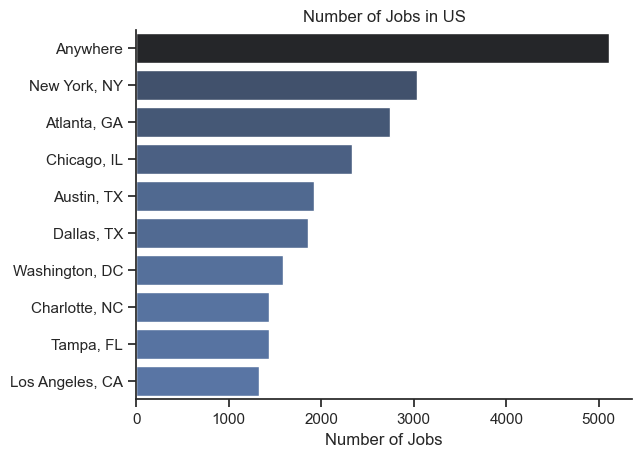

In [5]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

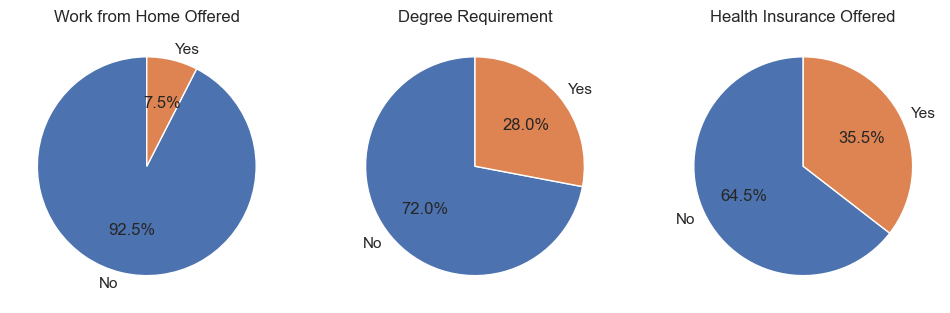

In [6]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered',
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

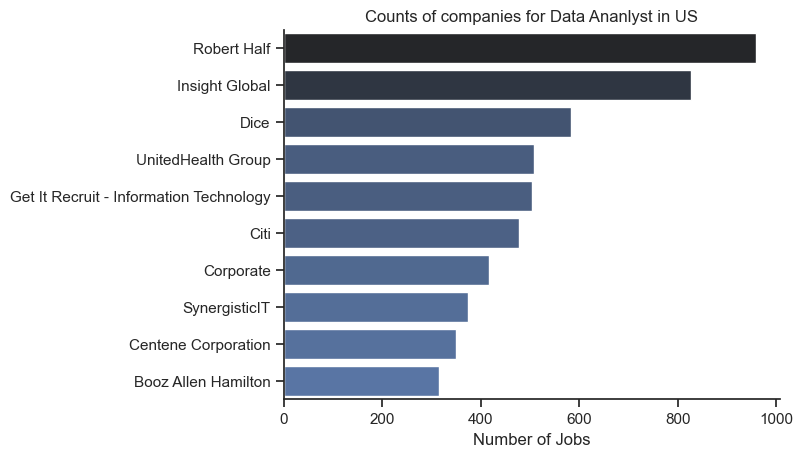

In [7]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of companies for Data Ananlyst in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()